In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import random

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

%matplotlib inline

warnings.filterwarnings('ignore')

sns.set(style = 'darkgrid') 

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [3]:
# reading file
#encoding = 'utf-8-sig' , encoding = "ISO-8859-1"
import csv 
df = pd.read_csv('G://Study Folder//DataScience Step Step//datasets//TTTTTT@.csv')
df.head()
df_original = df.copy()   # in case


In [4]:
df.shape  

(181691, 135)

In [5]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country         country_txt  region                   region_txt provstate           city   latitude   longitude  specificity  vicinity location summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  multiple  success  suicide  attacktype1                 attacktype1_txt  attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1                targtype1_txt  targsubtype1  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58  Dominican Republic       2  Central America & Caribbean       NaN  Santo Domingo  18.456792  -69.951164          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            1                   Assassination          NaN             NaN          NaN             NaN         14  Private Citizens & Property          68.0   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130              Mexico       1                North America   Federal    Mexico city  19.371887  -99.086624          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            6     Hostage Taking (Kidnapping)          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          45.0   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160         Philippines       5               Southeast Asia    Tarlac        Unknown  15.478598  120.599741          4.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            1                   Assassination          NaN             NaN          NaN             NaN         10          Journalists & Media          54.0   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78              Greece       8               Western Europe    Attica         Athens  37.997490   23.762728          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN       0.0        1        0            3               Bombing/Explosion          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          46.0   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101               Japan       4                    East Asia   Fukouka        Fukouka  33.580412  130.396361          1.0         0      NaN     NaN      1      1      1       -9.0          NaN             NaN       0.0        1        0            7  Facility/Infrastructure Attack          NaN             NaN          NaN             NaN          7      Government (Diplomatic)          46.0   

                                    targsubtype1_txt                        corp1                  target1  natlty1         natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3 targsubtype3_txt corp3 target3  natlty3 natlty3_txt                               gname gsubname gname2 gsubname2 gname3 gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  nperpcap  claimed  claimmode  \
0                                     Named Civilian                          NaN             Julio Guzman     58.0  Dominican Republic        NaN           NaN           NaN              NaN   NaN     NaN      NaN         NaN        NaN           NaN           NaN              NaN   NaN     NaN      NaN         NaN                              MANO-D      NaN    NaN       NaN    NaN       NaN    NaN          0.0          NaN          NaN           0     NaN       NaN      NaN        NaN   
1  Diplomatic Personnel (outside of embassy, cons...  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0             Belgium        NaN           NaN           NaN         

In [6]:
columns = df.columns.tolist()         
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [7]:
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region':'enc_region',\
                     'attacktype1_txt':'attacktype','attacktype1':'enc_attacktype',\
                     'provstate':'province','country':'enc_country',\
                     'targtype1_txt':'target_type','targtype1':'enc_target',\
                     'targsubtype1_txt':'target_subtype',\
                     'target1':'target_entity','weaptype1':'enc_weapon_type',\
                     'weaptype1_txt':'weapon_type','weapsubtype1_txt':'weapon_subtype','weapsubtype1':'enc_weapon_subtype',\
                     'corp1':'entity','natlty1':'enc_nationality','natlty1_txt':'nationality',\
                     'gname':'group','nkill':'killed','nwound':'wounded',\
                     'targsubtype':'enc_target_subtype',\
                     'ishostkid':'hostages/kidnapping','INT_LOG':'cross_border',\
                     'INT_IDEO':'ideological_international'}, inplace = True)

In [8]:

categorical = ['extended','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','multiple','enc_country','country_txt','enc_region','region_txt','vicinity','specificity','enc_attacktype','attacktype','enc_weapon_type','weapon_type','enc_weapon_subtype','weapon_subtype','success','suicide','target_entity','enc_target','target_type','target_subtype','enc_nationality','nationality','claimed','property','cross_border','ideological_international','province','entity','group','hostages/kidnapping','city','INT_MISC','INT_ANY','individual']
numerical = ['eventid','year','month','day','latitude','longitude','killed','nkillter','wounded']
text = ['approxdate','summary','related','location','motive']

In [9]:

for item in categorical:
    if item not in df.columns:
        pass
    else:
        df[item] = df[item].astype('category')

In [10]:

for feature in categorical:
    print(feature,":",len(df[feature].unique()),'labels')

extended : 2 labels
crit1 : 2 labels
crit2 : 2 labels
crit3 : 2 labels
doubtterr : 4 labels
alternative : 6 labels
alternative_txt : 6 labels
multiple : 3 labels
enc_country : 205 labels
country_txt : 205 labels
enc_region : 12 labels
region_txt : 12 labels
vicinity : 3 labels
specificity : 6 labels
enc_attacktype : 9 labels
attacktype : 9 labels
enc_weapon_type : 12 labels
weapon_type : 12 labels
enc_weapon_subtype : 31 labels
weapon_subtype : 31 labels
success : 2 labels
suicide : 2 labels
target_entity : 86007 labels
enc_target : 22 labels
target_type : 22 labels
target_subtype : 113 labels
enc_nationality : 216 labels
nationality : 216 labels
claimed : 4 labels
property : 3 labels
cross_border : 3 labels
ideological_international : 3 labels
province : 2856 labels
entity : 33239 labels
group : 3537 labels
hostages/kidnapping : 4 labels
city : 36675 labels
INT_MISC : 3 labels
INT_ANY : 3 labels
individual : 2 labels


In [11]:
len(categorical)

40

In [12]:
df.describe()

eventid           year          month            day       latitude     longitude  attacktype2  attacktype3   targsubtype1     targtype2  targsubtype2       natlty2    targtype3  targsubtype3      natlty3    guncertain1  guncertain2  guncertain3         nperps       nperpcap     claimmode       claim2  claimmode2      claim3  claimmode3    compclaim     weaptype2  weapsubtype2    weaptype3  weapsubtype3  weaptype4  weapsubtype4         killed        nkillus       nkillter  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000  177135.000000  1.771340e+05  6314.000000   428.000000  171318.000000  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000  1147.000000  181311.000000  1955.000000   320.000000  110576.000000  112202.000000  19083.000000  1890.000000  616.000000  318.000000  133.000000  4839.000000  13127.000000  11542.000000  1863.000000   1693.000000  73.000000     70.000000  171378.000000  117245.000000  114733.000000   
mean   2.002704e+11    2002.638997       6.467277      15.505644      23.498343 -4.586957e+02     3.719512     5.245327      46.971474     10.247218     55.311652    131.179442    10.021259     55.548769   144.564952       0.081440     0.265473     0.193750     -65.361154      -1.517727      7.022848     0.247619    7.176948    0.411950    6.729323    -6.296342      6.812524     10.754029     6.911433     11.643237   6.246575     10.842857       2.403272       0.045981       0.508058   
std    1.325955e+09      13.259430       3.388303       8.814045      18.569242  2.047790e+05     2.272023     2.246642      30.953357      5.709076     25.640310    125.951485     5.723447     26.288955   163.299295       0.273511     0.441698     0.395854     216.536633      12.830346      2.476851     0.974018    2.783725    0.492962    2.908003     4.234620      2.277081      7.594574     2.177956      8.493166   1.507212      8.192672      11.545741       5.681854       4.199937   
min    1.970000e+11    1970.000000       0.000000       0.000000     -53.154613 -8.618590e+07     1.000000     1.000000       1.000000      1.000000      1.000000      4.000000     1.000000      1.000000     4.000000       0.000000     0.000000     0.000000     -99.000000     -99.000000      1.000000    -9.000000    1.000000    0.000000    1.000000    -9.000000      1.000000      1.000000     2.000000      1.000000   5.000000      2.000000       0.000000       0.000000       0.000000   
25%    1.991020e+11    1991.000000       4.000000       8.000000      11.510046  4.545640e+00     2.000000     2.000000      22.000000      4.000000     34.000000     92.000000     3.000000     33.000000    75.000000       0.000000     0.000000     0.000000     -99.000000       0.000000      6.000000     0.000000    6.000000    0.000000    4.000000    -9.000000      5.000000      5.000000     5.000000      4.000000   5.000000      3.000000       0.000000       0.000000       0.000000   
50%    2.009020e+11    2009.000000       6.000000      15.000000      31.467463  4.324651e+01     2.000000     7.000000      35.000000     14.000000     67.000000     98.000000    14.000000     67.000000   110.000000       0.000000     0.000000     0.000000     -99.000000       0.000000      8.000000     0.000000    7.000000    0.000000    7.000000    -9.000000      6.000000      7.000000     6.000000      7.000000   6.000000      9.500000       0.000000       0.000000       0.000000   
75%    2.014080e+11    2014.000000       9.000000      23.000000      34.685087  6.871033e+01     7.000000     7.000000      74.000000     14.000000     69.000000    182.000000    14.000000     73.000000   182.000000       0.000000     1.000000     0.000000       1.000000       0.000000      8.000000     1.000000   10.000000    1.000000    9.000000     0.000000      8.000000     18.000000     9.000000     20.000000   6.000000     16.000000       2.000000       0.000000       0.000000   
max    2.017120e+11    2017.000000      12.000000      31.000000      74.633

In [13]:

def null_info(df, columns):
    df = df.drop(columns = columns)
    

    df_null_info = pd.DataFrame(np.random.randn(0,9)*0,columns = ['% of columns containing non_missing values',\
                                                                  '% of columns containing missing values',\
                                                                  '% of columns containing >50% missing values',\
                                                                  '% of columns containing <=50% missing values',\
                                                                  '% of columns containing >90% missing values',\
                                                                  'No. of features',\
                                                                  'No. of categorical features',\
                                                                  'No. of numerical features',\
                                                                  'No. of Text features'])
    
    df_null = pd.DataFrame(df.isnull().sum()/len(df))
    df_null.columns = ['Null_values']
    df_null_info.loc[0,'No. of features'] = round(df_null.shape[0])
    df_null_info.loc[0,'No. of categorical features']= round(len(categorical))
    df_null_info.loc[0,'No. of numerical features']= round(len(numerical))
    df_null_info.loc[0,'No. of Text features']= round(len(text))
    
    df_null_info.loc[0,'% of columns containing non_missing values'] = round(100*len(df_null[df_null.Null_values ==0.0])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing missing values'] = round(100*len(df_null[df_null.Null_values >0.0])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing >50% missing values'] = round(100*len(df_null[df_null.Null_values >0.50])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing <=50% missing values'] = round(100*len(df_null[df_null.Null_values <=0.50])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing >90% missing values'] = round(100*len(df_null[df_null.Null_values >0.90])/len(df_null),2)
    df_null_info = df_null_info.rename(index = {0:'Values'})
    return df_null_info.T

In [14]:
null_info(df,['success','eventid'])

Values
% of columns containing non_missing values     20.30
% of columns containing missing values         79.70
% of columns containing >50% missing values    57.89
% of columns containing <=50% missing values   42.11
% of columns containing >90% missing values    46.62
No. of features                               133.00
No. of categorical features                    40.00
No. of numerical features                       9.00
No. of Text features                            5.00

In [15]:
def missing_unique(df):
    df = df.drop(columns = ['success','eventid'])
    df_null = pd.DataFrame()
    for col in df.columns:
        df_null.loc[col, 'Unique Categories'] = len(df[col].unique())
        df_null.loc[col, '% of_Null_Values'] = round(df[col].isnull().sum()*100/ len(df),2)
        df_null.loc[col, 'dtype'] = df[col].dtype
    print("Shape of the Data:",df.shape)
    # Visualizing the missing values
    f,ax =plt.subplots(figsize=(20,6))
    plt.xticks(rotation=90)
    fig = sns.barplot(x = df_null.index , y = df_null['% of_Null_Values'], color = '#787887',alpha=0.5)
    plt.tick_params(axis='x', which='major', labelsize=10 ,labelcolor = '#2C2E2B' )  # change appearance of tick and tick labels
    plt.xlabel("Features" , fontsize = 15)
    plt.ylabel("% of_Null_Values" , fontsize = 15)
    plt.title("Missing_Values_in_the_Dataset", fontsize = 20, loc = 'center',fontweight="bold")
    plt.show()
    return df_null.sort_values(ascending = False, by = '% of_Null_Values')

Shape of the Data: (181691, 133)


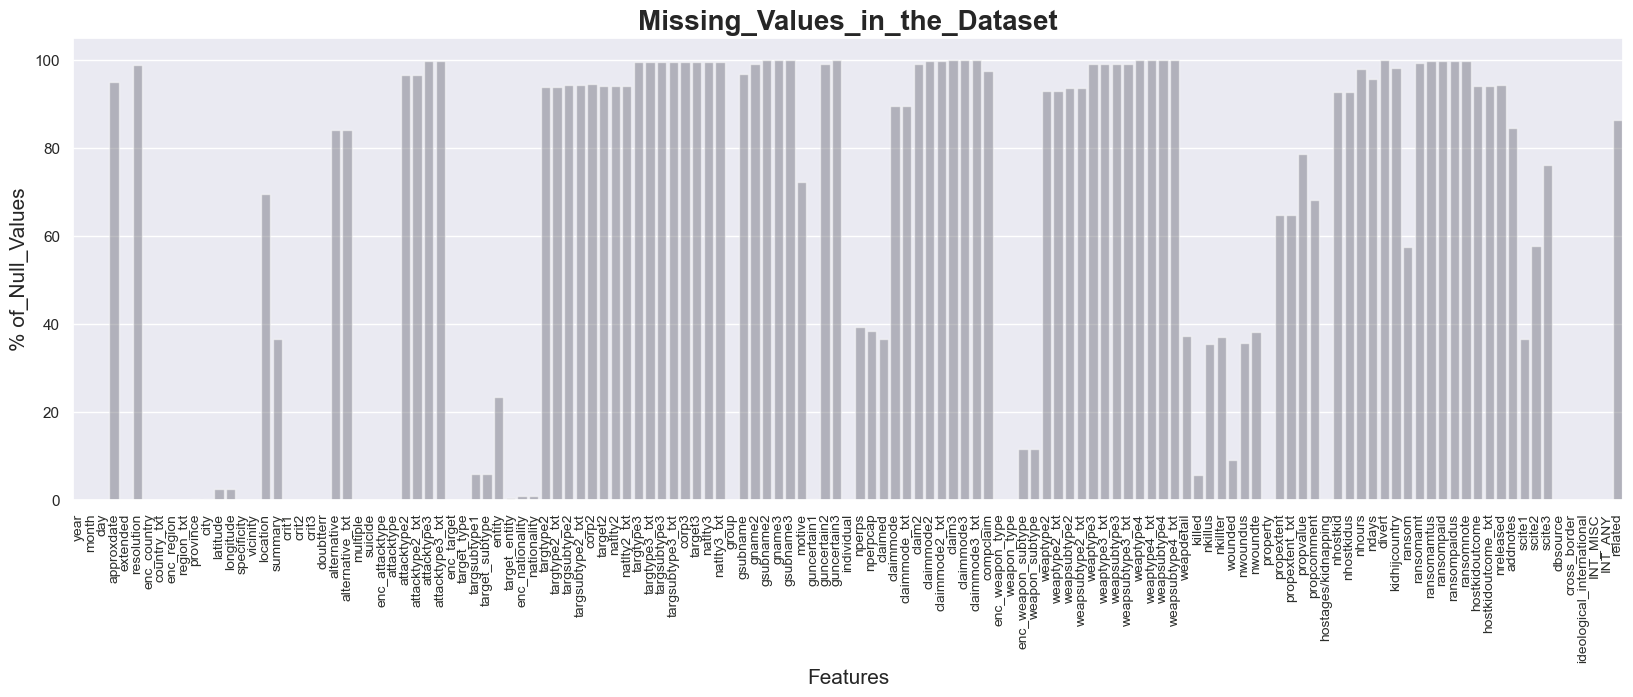

Unique Categories  % of_Null_Values     dtype
gsubname3                               15.0             99.99    object
weapsubtype4_txt                        17.0             99.96    object
weapsubtype4                            17.0             99.96   float64
weaptype4_txt                            6.0             99.96    object
weaptype4                                6.0             99.96   float64
claimmode3_txt                           9.0             99.93    object
claimmode3                               9.0             99.93   float64
gsubname2                               61.0             99.91    object
claim3                                   3.0             99.82   float64
guncertain3                              3.0             99.82   float64
gname3                                 117.0             99.82    object
divert                                 144.0             99.82    object
attacktype3_txt                          9.0             99.76    object
attacktype3                              9.0             99.76   float64
ransomnote                             388.0             99.72    object
ransompaidus                             9.0             99.70   float64
ransomamtus                             24.0             99.69   float64
claimmode2                              10.0             99.66   float64
claimmode2_txt                          10.0             99.66    object
ransompaid                             157.0             99.57   float64
corp3                                  423.0             99.44    object
targsubtype3                            93.0             99.40   float64
targsubtype3_txt                        93.0             99.40    object
natlty3_txt                            111.0             99.37    object
natlty3                                111.0             99.37   float64
targtype3                               21.0             99.35   float64
target3                                721.0             99.35    object
targtype3_txt                           21.0             99.35    object
ransomamt                              430.0             99.26   float64
weapsubtype3_txt                        23.0             99.07    object
weapsubtype3                            23.0             99.07   float64
weaptype3_txt                           11.0             98.97    object
weaptype3                               11.0             98.97   float64
claim2                                   4.0             98.96   float64
guncertain2                              3.0             98.92   float64
gname2                                 434.0             98.89    object
resolution                            1860.0             98.78    object
kidhijcountry                          218.0             98.18    object
nhours                                  36.0             97.76   float64
compclaim                                4.0             97.34   float64
gsubname                              1184.0             96.76    object
attacktype2                             10.0             96.52   float64
attacktype2_txt                         10.0             96.52    object
ndays                                  329.0             95.53   float64
approxdate                            2245.0             94.91    object
corp2                                 2692.0             94.43    object
nreleased                              157.0             94.28   float64
targsubtype2                           108.0             94.12   float64
targsubtype2_txt                       108.0             94.12    object
natlty2                                159.0             94.04   float64
natlty2_txt                            159.0             94.04    object
hostkidoutcome                           8.0             93.95   float64
hostkidoutcome_txt                       8.0             93.95    object
target2                               5044.0             93.93    object
targtype2   

In [16]:
missing_unique(df) 

In [17]:
df[df['year']>1997].isnull().sum()*100/len(df[df['year']>1997])

eventid                       0.000000
year                          0.000000
month                         0.000000
day                           0.000000
approxdate                   91.935823
extended                      0.000000
resolution                   99.196910
enc_country                   0.000000
country_txt                   0.000000
enc_region                    0.000000
region_txt                    0.000000
province                      0.008758
city                          0.380088
latitude                      0.817978
longitude                     0.817978
specificity                   0.005255
vicinity                      0.000000
location                     52.140405
summary                       0.000000
crit1                         0.000000
crit2                         0.000000
crit3                         0.000000
doubtterr                     0.000876
alternative                  83.817347
alternative_txt              83.817347
multiple                 

In [18]:
df[df['year']>2008].isnull().sum()*100/len(df[df['year']>2008])


eventid                       0.000000
year                          0.000000
month                         0.000000
day                           0.000000
approxdate                   90.207132
extended                      0.000000
resolution                   99.603435
enc_country                   0.000000
country_txt                   0.000000
enc_region                    0.000000
region_txt                    0.000000
province                      0.003277
city                          0.286226
latitude                      0.579007
longitude                     0.579007
specificity                   0.004370
vicinity                      0.000000
location                     49.879829
summary                       0.000000
crit1                         0.000000
crit2                         0.000000
crit3                         0.000000
doubtterr                     0.001092
alternative                  83.492833
alternative_txt              83.492833
multiple                 

In [19]:
df[df['year']>2011].isnull().sum()*100/len(df[df['year']>2011])


eventid                        0.000000
year                           0.000000
month                          0.000000
day                            0.000000
approxdate                    88.511695
extended                       0.000000
resolution                   100.000000
enc_country                    0.000000
country_txt                    0.000000
enc_region                     0.000000
region_txt                     0.000000
province                       0.002600
city                           0.000000
latitude                       0.622782
longitude                      0.622782
specificity                    0.000000
vicinity                       0.000000
location                      56.403989
summary                        0.000000
crit1                          0.000000
crit2                          0.000000
crit3                          0.000000
doubtterr                      0.001300
alternative                   81.350357
alternative_txt               81.350357


In [20]:
df = df.drop(columns = ['eventid','dbsource','specificity','guncertain1','INT_MISC','INT_ANY'])
df = df.loc[:,df.isnull().sum()/len(df) <0.20]
df.head()

year  month  day extended enc_country         country_txt enc_region                   region_txt province           city   latitude   longitude vicinity crit1 crit2 crit3 doubtterr multiple success suicide enc_attacktype                      attacktype enc_target                  target_type  targsubtype1                                     target_subtype            target_entity enc_nationality         nationality                               group individual enc_weapon_type weapon_type  \
0  1970      7    2        0          58  Dominican Republic          2  Central America & Caribbean      NaN  Santo Domingo  18.456792  -69.951164        0     1     1     1       0.0      0.0       1       0              1                   Assassination         14  Private Citizens & Property          68.0                                     Named Civilian             Julio Guzman            58.0  Dominican Republic                              MANO-D          0              13     Unknown   
1  1970      0    0        0         130              Mexico          1                North America  Federal    Mexico city  19.371887  -99.086624        0     1     1     1       0.0      0.0       1       0              6     Hostage Taking (Kidnapping)          7      Government (Diplomatic)          45.0  Diplomatic Personnel (outside of embassy, cons...  Nadine Chaval, daughter            21.0             Belgium  23rd of September Communist League          0              13     Unknown   
2  1970      1    0        0         160         Philippines          5               Southeast Asia   Tarlac        Unknown  15.478598  120.599741        0     1     1     1       0.0      0.0       1       0              1                   Assassination         10          Journalists & Media          54.0                    Radio Journalist/Staff/Facility                 Employee           217.0       United States                             Unknown          0              13     Unknown   
3  1970      1    0        0          78              Greece          8               Western Europe   Attica         Athens  37.997490   23.762728        0     1     1     1       0.0      0.0       1       0              3               Bombing/Explosion          7      Government (Diplomatic)          46.0                                  Embassy/Consulate             U.S. Embassy           217.0       United States                             Unknown          0               6  Explosives   
4  1970      1    0        0         101               Japan          4                    East Asia  Fukouka        Fukouka  33.580412  130.396361        0     1     1     1      -9.0      0.0       1       0              7  Facility/Infrastructure Attack          7      Government (Diplomatic)          46.0                                  Embassy/Consulate           U.S. Consulate           217.0       United States                             Unknown          0               8  Incendiary   

  enc_weapon_subtype          weapon_subtype  killed  wounded property hostages/kidnapping cross_border ideological_international  
0                NaN                     NaN     1.0      0.0        0                 0.0            0                         0  
1                NaN                     NaN     0.0      0.0        0                 1.0            0                         1  
2                NaN                     NaN     1.0      0.0        0                 0.0           -9                        -9  
3               16.0  Unknown Explosive Type     NaN      NaN        1                 0.0           -9                        -9  
4                NaN                     NaN     NaN      NaN        1                 0.0           -9                        -9

In [21]:
df['Date'] = pd.to_datetime(df[['year','month','day']], errors = 'coerce')
df.head()

year  month  day extended enc_country         country_txt enc_region                   region_txt province           city   latitude   longitude vicinity crit1 crit2 crit3 doubtterr multiple success suicide enc_attacktype                      attacktype enc_target                  target_type  targsubtype1                                     target_subtype            target_entity enc_nationality         nationality                               group individual enc_weapon_type weapon_type  \
0  1970      7    2        0          58  Dominican Republic          2  Central America & Caribbean      NaN  Santo Domingo  18.456792  -69.951164        0     1     1     1       0.0      0.0       1       0              1                   Assassination         14  Private Citizens & Property          68.0                                     Named Civilian             Julio Guzman            58.0  Dominican Republic                              MANO-D          0              13     Unknown   
1  1970      0    0        0         130              Mexico          1                North America  Federal    Mexico city  19.371887  -99.086624        0     1     1     1       0.0      0.0       1       0              6     Hostage Taking (Kidnapping)          7      Government (Diplomatic)          45.0  Diplomatic Personnel (outside of embassy, cons...  Nadine Chaval, daughter            21.0             Belgium  23rd of September Communist League          0              13     Unknown   
2  1970      1    0        0         160         Philippines          5               Southeast Asia   Tarlac        Unknown  15.478598  120.599741        0     1     1     1       0.0      0.0       1       0              1                   Assassination         10          Journalists & Media          54.0                    Radio Journalist/Staff/Facility                 Employee           217.0       United States                             Unknown          0              13     Unknown   
3  1970      1    0        0          78              Greece          8               Western Europe   Attica         Athens  37.997490   23.762728        0     1     1     1       0.0      0.0       1       0              3               Bombing/Explosion          7      Government (Diplomatic)          46.0                                  Embassy/Consulate             U.S. Embassy           217.0       United States                             Unknown          0               6  Explosives   
4  1970      1    0        0         101               Japan          4                    East Asia  Fukouka        Fukouka  33.580412  130.396361        0     1     1     1      -9.0      0.0       1       0              7  Facility/Infrastructure Attack          7      Government (Diplomatic)          46.0                                  Embassy/Consulate           U.S. Consulate           217.0       United States                             Unknown          0               8  Incendiary   

  enc_weapon_subtype          weapon_subtype  killed  wounded property hostages/kidnapping cross_border ideological_international       Date  
0                NaN                     NaN     1.0      0.0        0                 0.0            0                         0 1970-07-02  
1                NaN                     NaN     0.0      0.0        0                 1.0            0                         1        NaT  
2                NaN                     NaN     1.0      0.0        0                 0.0           -9                        -9        NaT  
3               16.0  Unknown Explosive Type     NaN      NaN        1                 0.0           -9                        -9        NaT  
4                NaN                     NaN     NaN      NaN        1                 0.0           -9                        -9        NaT

In [22]:

df['week'] = df['Date'].dt.isocalendar().week
df['day_name'] = df['Date'].dt.day_name()
df['weekday'] = df['Date'].dt.weekday
df['is_weekend'] = np.where(((df['Date']).dt.dayofweek) < 5,0,1)
df.dropna(subset = ['Date','latitude','longitude'], inplace = True)
df.reset_index(inplace = True, drop = True)
df['casualities'] = df['killed']+df['wounded']

In [23]:
df.head()

year  month  day extended enc_country         country_txt enc_region                   region_txt    province           city   latitude   longitude vicinity crit1 crit2 crit3 doubtterr multiple success suicide enc_attacktype                      attacktype enc_target                  target_type  targsubtype1                                   target_subtype                                      target_entity enc_nationality         nationality                group individual enc_weapon_type  \
0  1970      7    2        0          58  Dominican Republic          2  Central America & Caribbean         NaN  Santo Domingo  18.456792  -69.951164        0     1     1     1       0.0      0.0       1       0              1                   Assassination         14  Private Citizens & Property          68.0                                   Named Civilian                                       Julio Guzman            58.0  Dominican Republic               MANO-D          0              13   
1  1970      1    1        0         217       United States          1                North America    Illinois          Cairo  37.005105  -89.176269        0     1     1     1       0.0      0.0       1       0              2                   Armed Assault          3                       Police          22.0  Police Building (headquarters, station, school)                          Cairo Police Headquarters           217.0       United States   Black Nationalists          0               5   
2  1970      1    2        0         218             Uruguay          3                South America  Montevideo     Montevideo -34.891151  -56.187214        0     1     1     1       0.0      0.0       0       0              1                   Assassination          3                       Police          25.0                  Police Security Forces/Officers  Juan Maria de Lucah/Chief of Directorate of in...           218.0             Uruguay  Tupamaros (Uruguay)          0               5   
3  1970      1    2        0         217       United States          1                North America  California        Oakland  37.791927 -122.225906        0     1     1     1       1.0      0.0       1       0              3               Bombing/Explosion         21                    Utilities         107.0                                      Electricity                                    Edes Substation           217.0       United States              Unknown          0               6   
4  1970      1    2        0         217       United States          1                North America   Wisconsin        Madison  43.076592  -89.412488        0     1     1     1       0.0      0.0       1       0              7  Facility/Infrastructure Attack          4                     Military          28.0              Military Recruiting Station/Academy  R.O.T.C. offices at University of Wisconsin, M...           217.0       United States      New Year's Gang          0               8   

  weapon_type enc_weapon_subtype                     weapon_subtype  killed  wounded property hostages/kidnapping cross_border ideological_international       Date  week  day_name  weekday  is_weekend  casualities  
0     Unknown                NaN                                NaN     1.0      0.0        0                 0.0            0                         0 1970-07-02    27  Thursday      3.0           0          1.0  
1    Firearms                5.0                   Unknown Gun Type     0.0      0.0        1                 0.0           -9                        -9 1970-01-01     1  Thursday      3.0           0          0.0  
2    Firearms                2.0  Automatic or Semi-Automatic Rifle     0.0      0.0        0                 0.0            0                         0 1970-01-02     1    Friday      4.0           0          0.0  
3  Explosives               16.0             Unknown Explosive Type     0.0      0.0        1                 0.0           -9      

In [24]:
df.isnull().sum()

year                             0
month                            0
day                              0
extended                         0
enc_country                      0
country_txt                      0
enc_region                       0
region_txt                       0
province                       406
city                           423
latitude                         0
longitude                        0
vicinity                         0
crit1                            0
crit2                            0
crit3                            0
doubtterr                        1
multiple                         1
success                          0
suicide                          0
enc_attacktype                   0
attacktype                       0
enc_target                       0
target_type                      0
targsubtype1                 10093
target_subtype               10093
target_entity                  593
enc_nationality               1498
nationality         

In [25]:
def impute_Nan(data, feature):
    if (data[feature].dtype == 'int') or (data[feature].dtype == 'float'):
        data[feature + "_median" ] = data[feature].fillna(data[feature].median())
        #data[feature + "_mean" ] = data[feature].fillna(data[feature].mean())
        data.drop(feature, axis = 1)
    elif (data[feature].dtype == 'category') or (data[feature].dtype == 'bool'):
        data[feature + "_mode" ] = data[feature].fillna(data[feature].mode()[0])
        data.drop(feature, axis = 1)

In [26]:
df.dtypes

year                                  int64
month                                 int64
day                                   int64
extended                           category
enc_country                        category
country_txt                        category
enc_region                         category
region_txt                         category
province                           category
city                               category
latitude                            float64
longitude                           float64
vicinity                           category
crit1                              category
crit2                              category
crit3                              category
doubtterr                          category
multiple                           category
success                            category
suicide                            category
enc_attacktype                     category
attacktype                         category
enc_target                      

In [27]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['killed'].max(),'that took place in',df.loc[df['killed'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [28]:

df_copy = df.copy()
df_copy1 = df.copy()
df_copy.drop(columns = ['enc_country','enc_region','enc_attacktype','enc_target','enc_nationality','enc_weapon_type','enc_weapon_subtype'],inplace = True)
df_copy1.drop(columns = ['enc_country','enc_region','enc_attacktype','enc_target','enc_nationality','enc_weapon_type','enc_weapon_subtype'],inplace = True)

In [29]:
df_copy['weapon_type'] = df_copy['weapon_type'].apply(lambda x: x.split()[0] if 'Vehicle' in x.split() else x)

In [30]:
def count_plot(data,feature,palette=None,ax=None):
    if data[feature].value_counts().shape[0]>15:
        plt.figure(figsize=(17,6))
        ax = sns.countplot(x=feature,data=data,\
                          order=data[feature].value_counts()[:20].index,\
                          palette=palette,\
                          edgecolor=sns.color_palette('dark',7),\
                          ax=None)
        total = float(len(data))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        sns.set_context('talk')
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100*p.get_height()/total,'.1f')
            x = p.get_x()+p.get_width()/ 2.
            y = p.get_height()
            ax.annotate(percentage,(x,y),ha='center',va='center',xytext=(0,9),textcoords='offset points',fontsize=16)
        plt.show()
    else:
        plt.figure(figsize=(10,6))
        ax = sns.countplot(x=feature,data=data,\
                          palette=palette,\
                          edgecolor=sns.color_palette('dark',7),\
                          order=data[feature].value_counts().index,ax=None)
        total = float(len(data))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        sns.set_context('talk')
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100*p.get_height()/total,'.1f')
            x = p.get_x()+p.get_width()/2.
            y = p.get_height() 
            ax.annotate(percentage,(x,y),ha='center',va='center',xytext=(0,9),textcoords='offset points',fontsize=16)
    plt.tight_layout()
    plt.show()

In [31]:
columns = list()
for item in df_copy.select_dtypes('category'):
    columns.append(item)

for item in columns:
    if item not in df_copy.columns:
        pass
    else:
        df_copy[item] = df_copy[item].astype(object)

In [32]:
def label_rename(data , feature):
    if data[feature].nunique() == 2:
        data[feature +"_rename"] = data[feature].map({0:'Unsuccessful attempt' ,1:'Successful attempt'} )
    elif data[feature].nunique() == 3 :
        data[feature+"_rename"] = data[feature].map({0:'Unsuccessful attempt' , 1:'Successful attempt' , -9:'Unknown'} )
    
    return data[feature+"_rename"]

In [33]:
def country_analysis(data , country=None , feature1=None , feature2=None , line_color=None , palette=None , title =None):
    plt.figure(figsize = (20,17))
    #Plot 1
    plt.subplot(2,2,1)
    sns.countplot(y = data.loc[data['country_txt'] == country]['city'] ,\
                  order = data.loc[data.country_txt == country].city.value_counts()[:10].index,\
                  data = data ,\
                  palette = sns.color_palette(palette,10),\
                  edgecolor = sns.color_palette('dark',5))
    plt.xticks(rotation = 90)
    plt.title(f"Terror attacks on Top 10 cities of {country}",weight = 'bold' ,fontsize = 18 ,loc = 'left')
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('City',fontsize = 20)
    
    #Plot 2
    plt.subplot(2,2,2)
    plt.pie(x = label_rename(data.query('country_txt == @country') , feature1).value_counts().values.tolist() ,\
            labels = label_rename(data.query('country_txt == @country') , feature1).value_counts().index.tolist() ,\
            autopct='%1.1f%%' ,\
            #explode = np.linspace(0.05 ,0.1  , 2) ,\
            pctdistance=0.45,\
            wedgeprops={"edgecolor":"1",'linewidth': 1,
                    'linestyle': 'dashed', 'antialiased': True},  textprops={'fontsize':20})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title ,weight = 'bold' ,fontsize = 18 ,loc = 'left',pad =30 )
    plt.axis('equal')
    
    #Plot 3
    plt.subplot(2,2,3)
    data.query('country_txt == @country').groupby(['year'])['casualities'].sum().plot(xticks = data.loc[data.country_txt == country].groupby(['year'])['casualities'].sum().index, rot=90 , color = line_color)
    plt.title(f"Total casualities from (1970 - 2017) in {country}", fontdict = {'fontsize' : 18 , 'weight': 'bold' } , loc = 'left')
    plt.ylabel("Casualities" ,fontsize = 20)
    plt.xlabel('Year',fontsize = 20)
   
    
    
    #Plot 4
    plt.subplot(2,2,4)
    sns.countplot(x = data.query('country_txt == @country').group ,\
                  data = data ,\
                  order = data.query('country_txt == @country').group.value_counts()[:10].index[1:],\
                  palette = sns.color_palette(palette,7),\
                  edgecolor = sns.color_palette('dark',5))
    plt.title(f"Terrorist Groups active/were active in {country}",weight = 'bold' ,fontsize = 18 , loc = 'left')
    plt.xticks(rotation =90)
    plt.xlabel('Group',fontsize = 20)
    plt.ylabel('Attack_Count',fontsize = 20)
    
    plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1)
    plt.tight_layout()   
    plt.show()

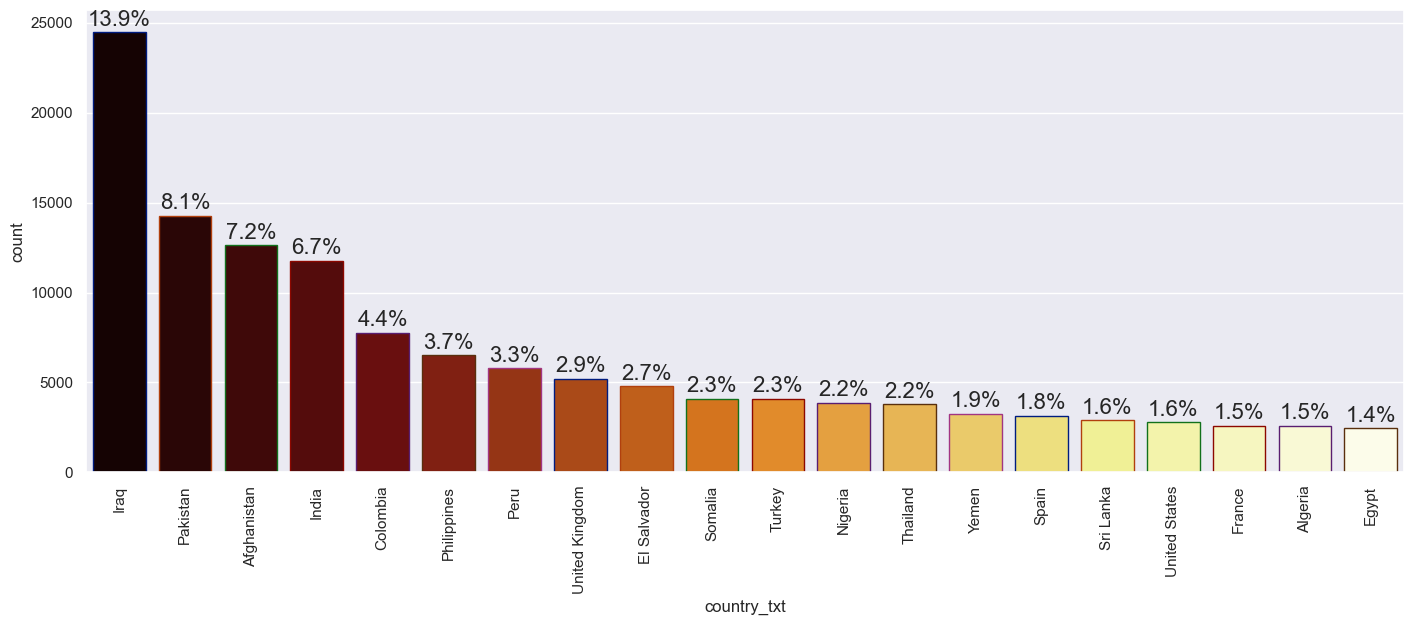

<Figure size 640x480 with 0 Axes>

In [34]:
count_plot(df_copy,'country_txt', 'afmhot')

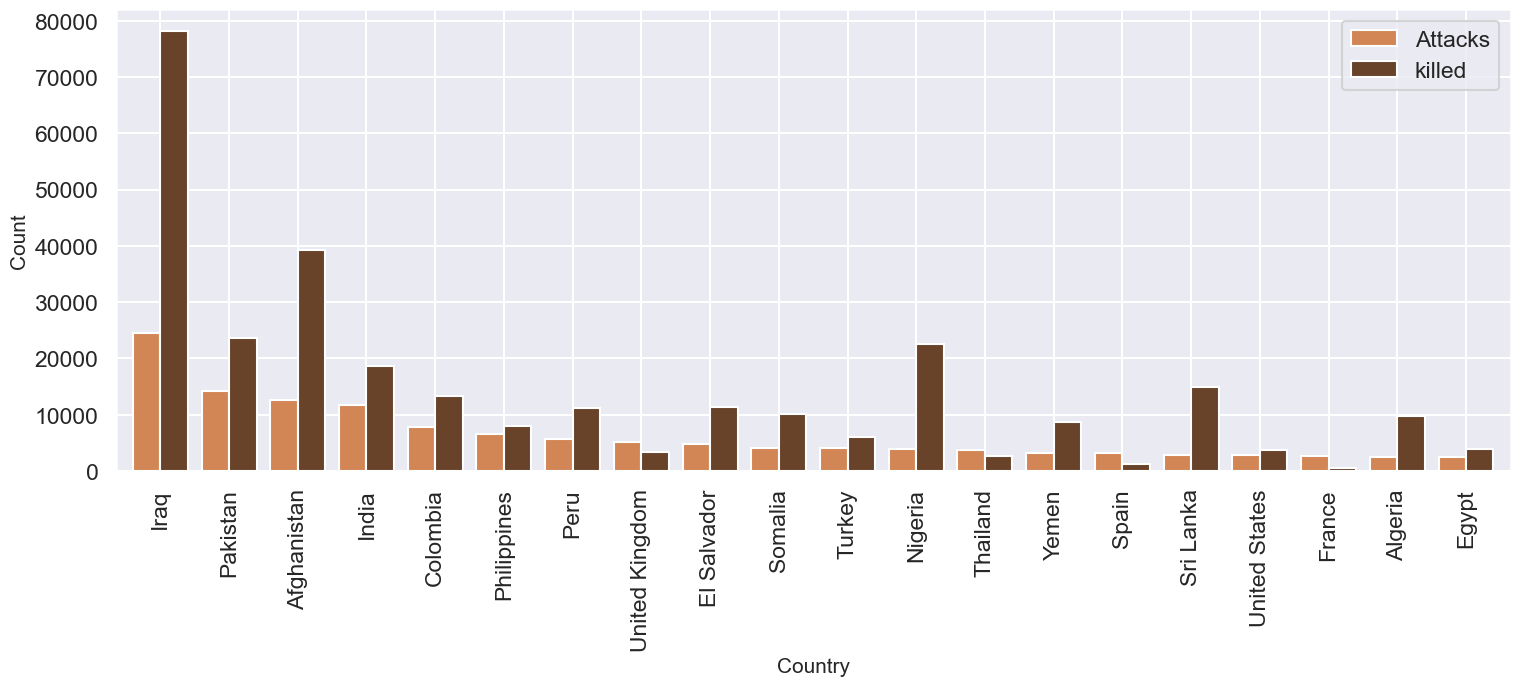

In [35]:

attacks = df_copy.country_txt.value_counts()[:20].to_frame()
attacks.columns = ['Attacks']
kills = df_copy.groupby(['country_txt'])['killed'].sum().sort_values(ascending =False).to_frame()
attacks.merge(kills, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.8 , color = sns.color_palette('copper_r',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel("Count" ,fontsize = 15)
plt.xlabel("Country",fontsize = 15)
plt.show()

In [36]:
df_copy['casualities'] = df_copy['killed']+df_copy['wounded']

In [37]:
impute_Nan(df_copy , 'casualities')

In [38]:
mapbox_access_token = "pk.eyJ1IjoibWF0c3VqanUiLCJhIjoiY2tmcXFiczFiMGRpdzMybzBxZmxtaTVxbiJ9.0zdao0fZdKyGb7CO8dPAVg"
def geo_coordinate(data , country = None , color =None):
    if country is not None:
        data = data[data['country_txt'] == country]
        random.seed(210)
        zoom = 5
    else:
        data = data
        country = 'Whole World'
        zoom = 2
    
    fig = go.Figure()
    new_customdatadf = np.stack(  
    (
        data["casualities_median"],
        data["city"],
        data["year"],
        data["province"],
        data['country_txt'],
        data['group'],
        data['attacktype']
    ),
    axis=-1,
    )
    fig.add_traces(
        go.Scattermapbox(
            lon=data["longitude"],
            lat=data["latitude"],
            mode="markers",
            marker=dict(size=10, allowoverlap=False, opacity=0.7, color=color),
            
            customdata=new_customdatadf, 
            hovertemplate="""<extra></extra>lat: %{lat}<br>long: %{lon}<br>casualities: %{customdata[0]}<br>city: %{customdata[1]}<br>State: %{customdata[3]}<br>Country: %{customdata[4]}<br>Group taken responsibiltiy: %{customdata[5]}<br>Attack_type: %{customdata[6]}<br>attack happened in: %{customdata[2]}""",
        ),
    )

    fig.update_layout(
        title=dict(
            text=f"<b>Satellite Overview of {country}</b>",
            font=dict(family="Cabin Sketch", size=20, color="black",),
            xanchor="left",
            xref="container",
        ),
        uirevision="foo",
        hovermode="closest",
        hoverdistance=2,
        mapbox=dict(
            accesstoken=mapbox_access_token,
            style="dark",
            center=dict(
                lat=random.choice(data["latitude"].tolist()),
                lon=random.choice(data["longitude"].tolist()),
            ),
            zoom=zoom,
        ),
        annotations = [dict(showarrow=False,
        text='(Zoom In/Zoom Out to see all points properly)',
        xanchor='right',
        x=1,
        yanchor='top',
        y=1.1
                )]
    )
    return fig

In [39]:
geo_coordinate(df_copy , color = 'Crimson' , country = 'India')


In [40]:
px.set_mapbox_access_token(mapbox_access_token)
def geo_coordinate_heatmap(data,country):
    data = data[data['country_txt']==country]
    random.seed(210)
    zoom = 4
    fig = px.density_mapbox(data,lat='latitude',lon='longitude',z='casualities_median',radius=10,
                           center=dict(
                           lat=random.choice(data['latitude'].tolist()),
                           lon=random.choice(data['longitude'].tolist()),
                           ), zoom=zoom,
                                       mapbox_style='dark',range_color=[data['casualities_median'].min(),data['casualities_median'].max()])
    fig.show()

In [41]:
geo_coordinate_heatmap(df_copy,'India')

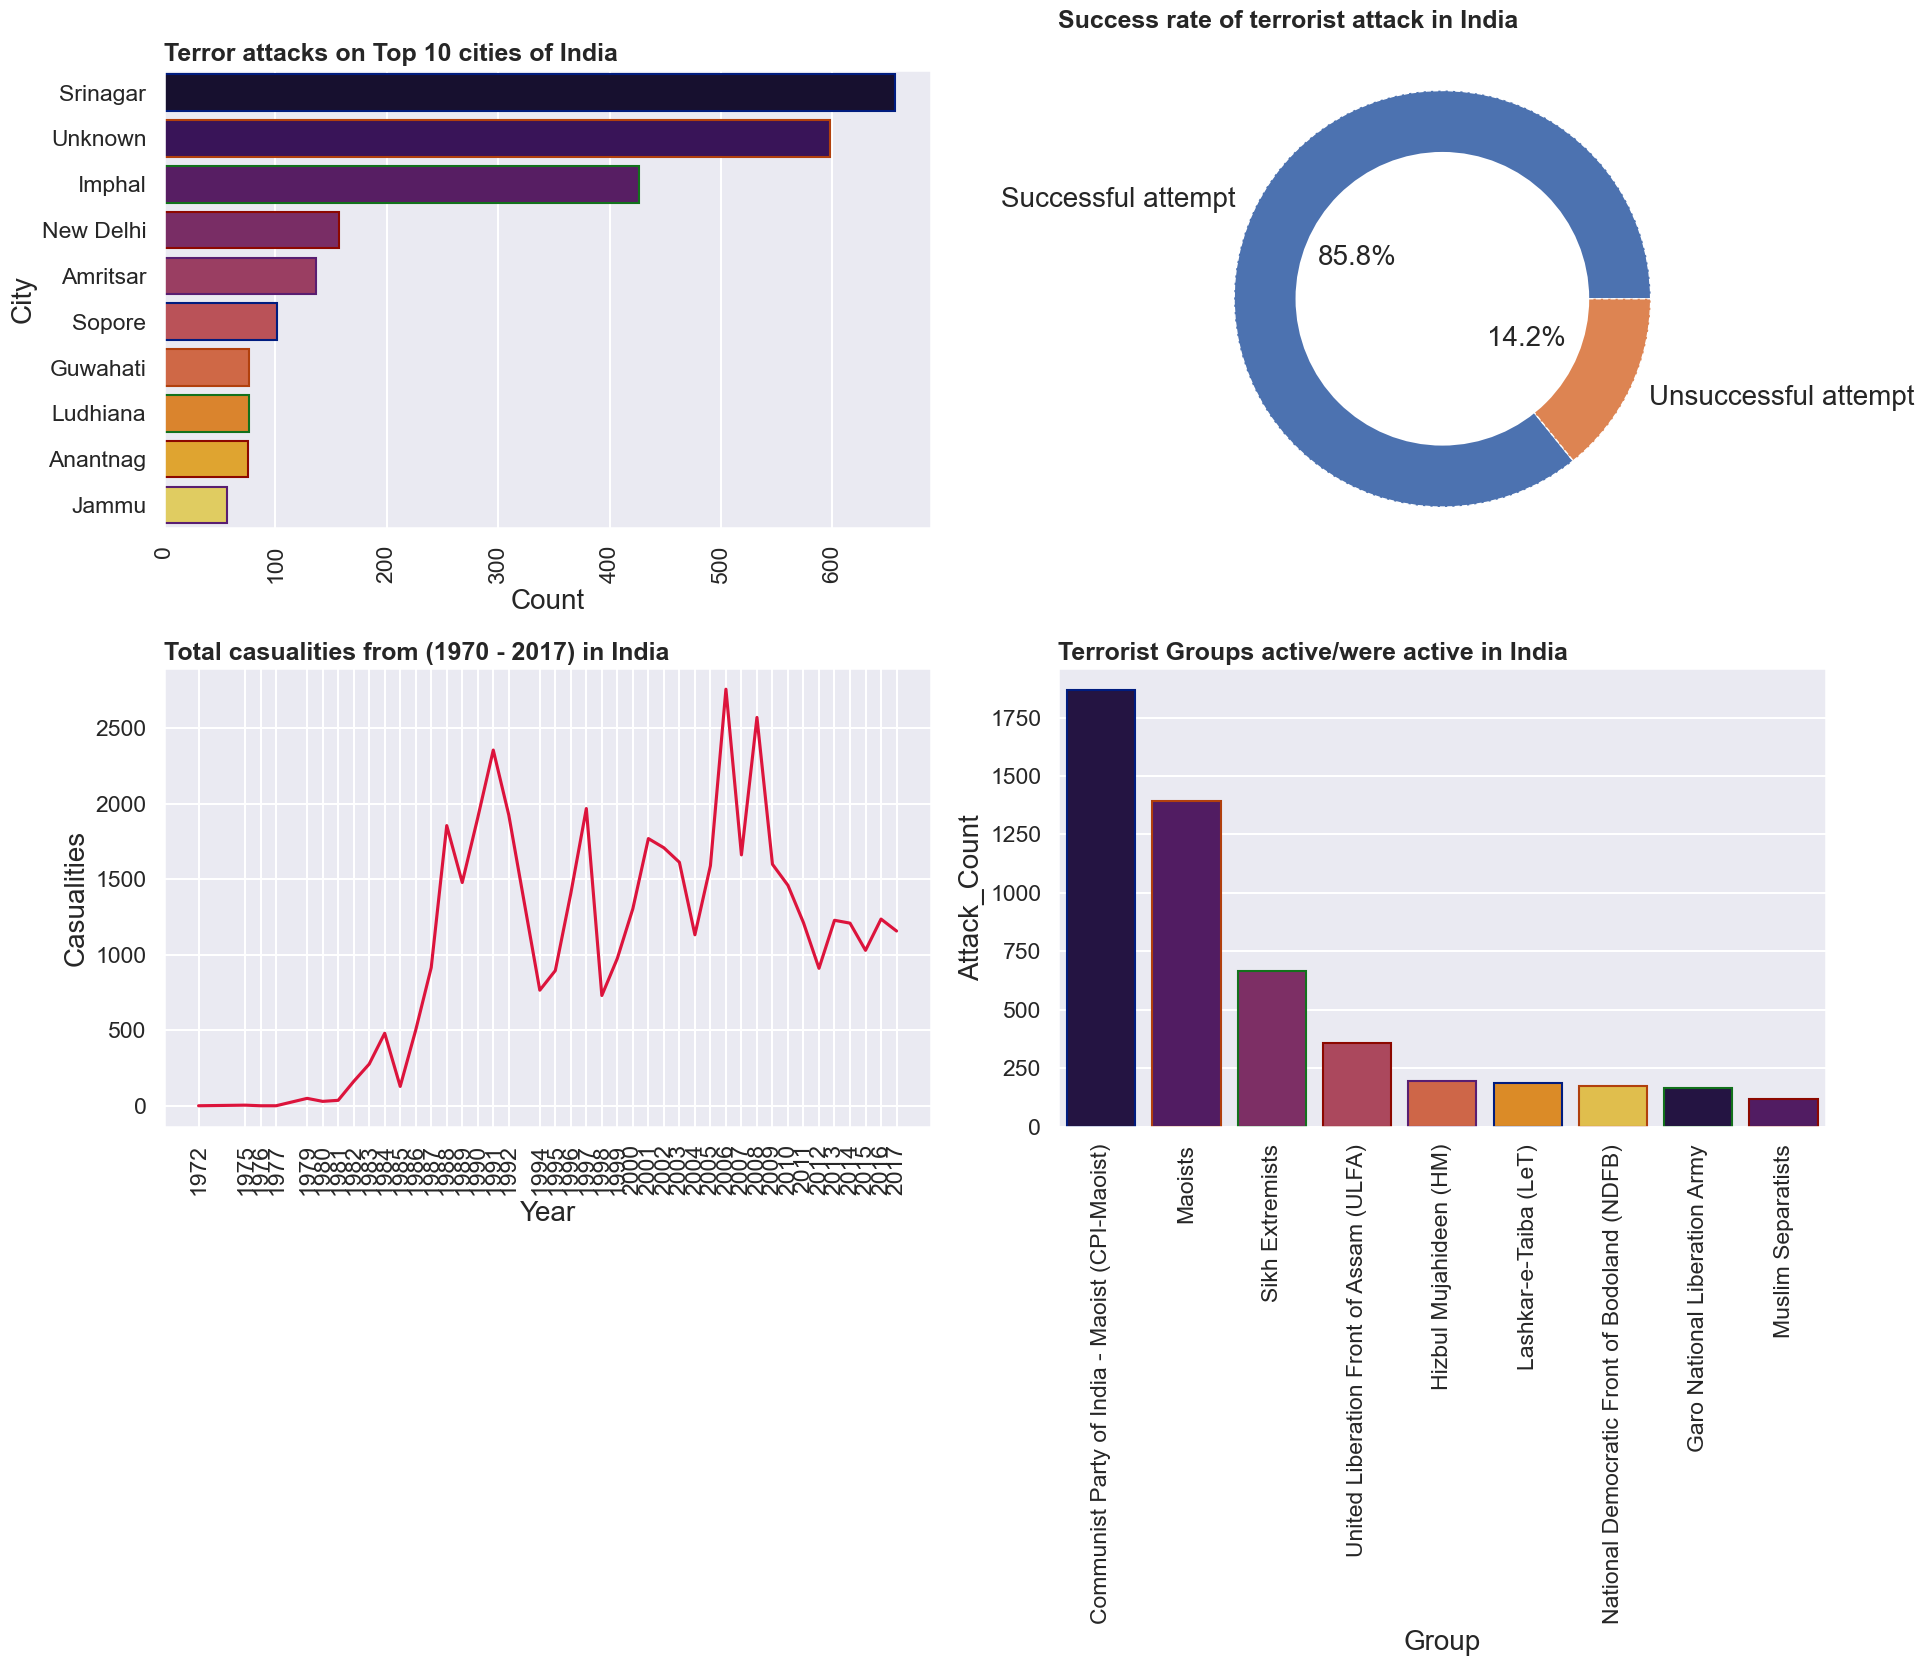

In [42]:
country_analysis(df_copy,country='India',feature1='success',title='Success rate of terrorist attack in India',palette='inferno',line_color='crimson')

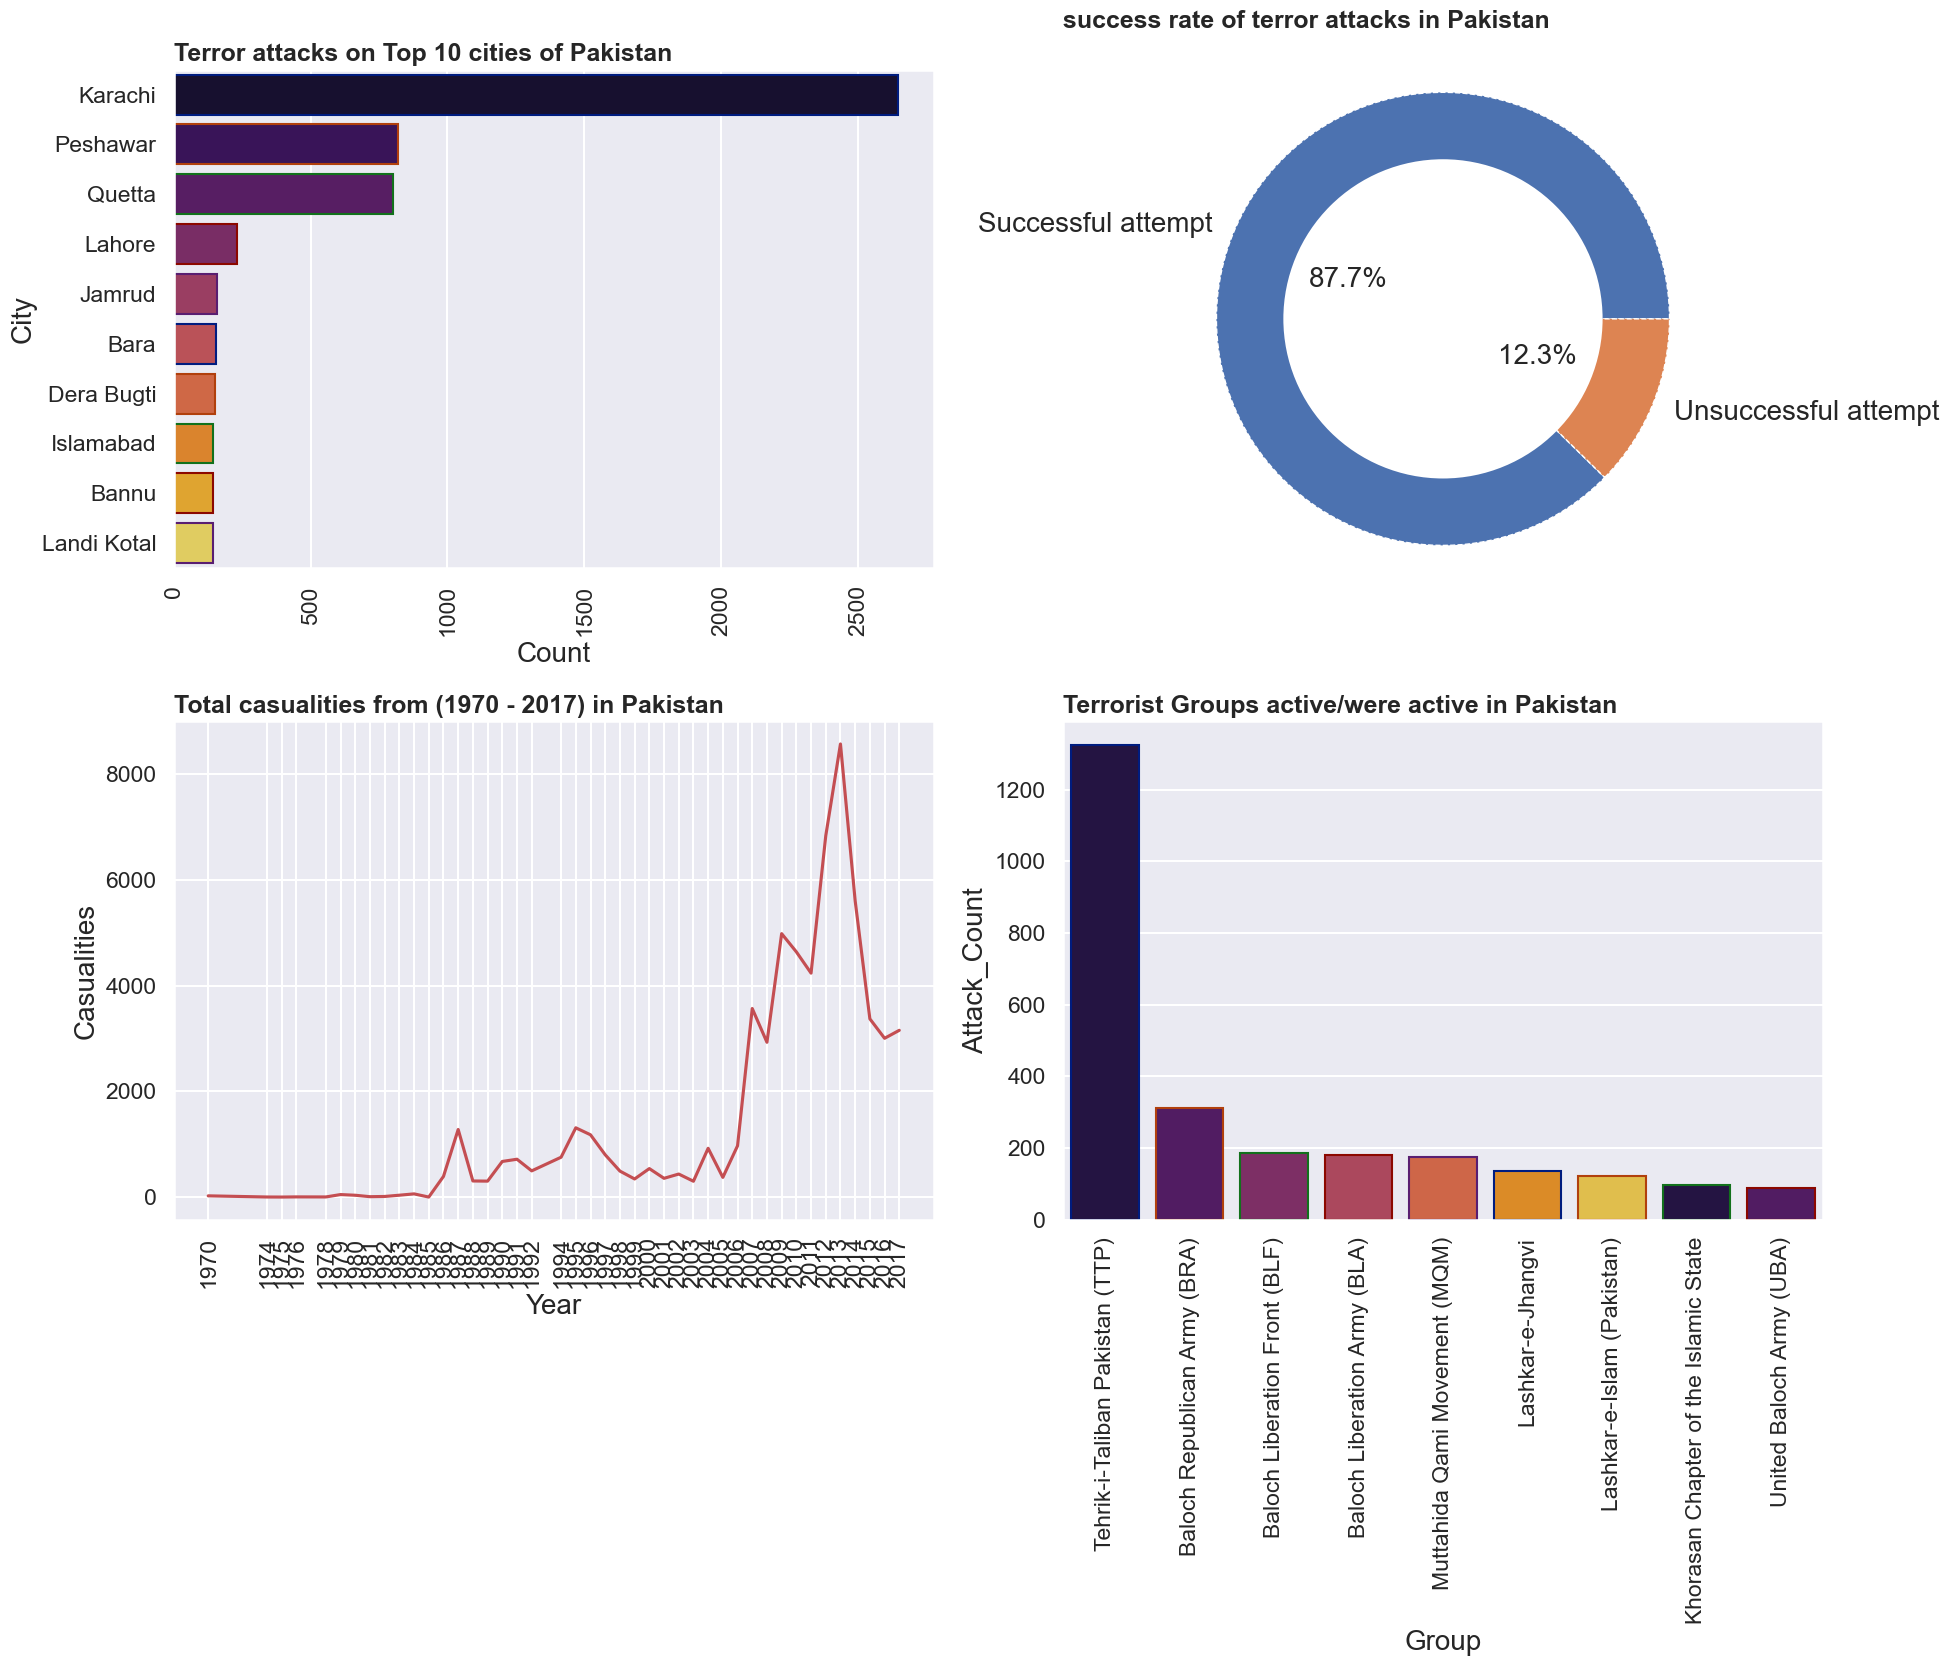

In [43]:
country_analysis(df_copy,country='Pakistan',feature1='success',title='success rate of terror attacks in Pakistan',palette='inferno',line_color='r')

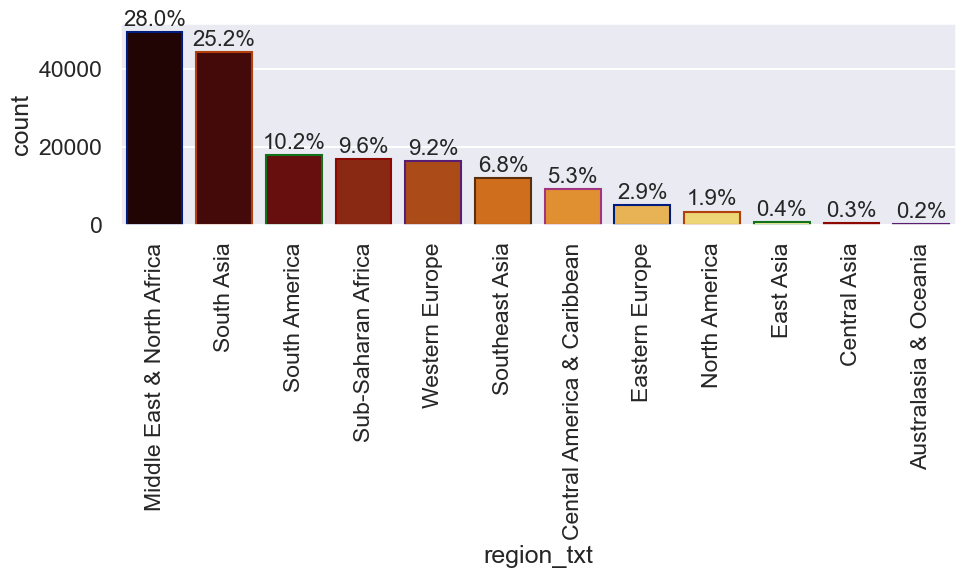

In [44]:
count_plot(df_copy,'region_txt','afmhot')

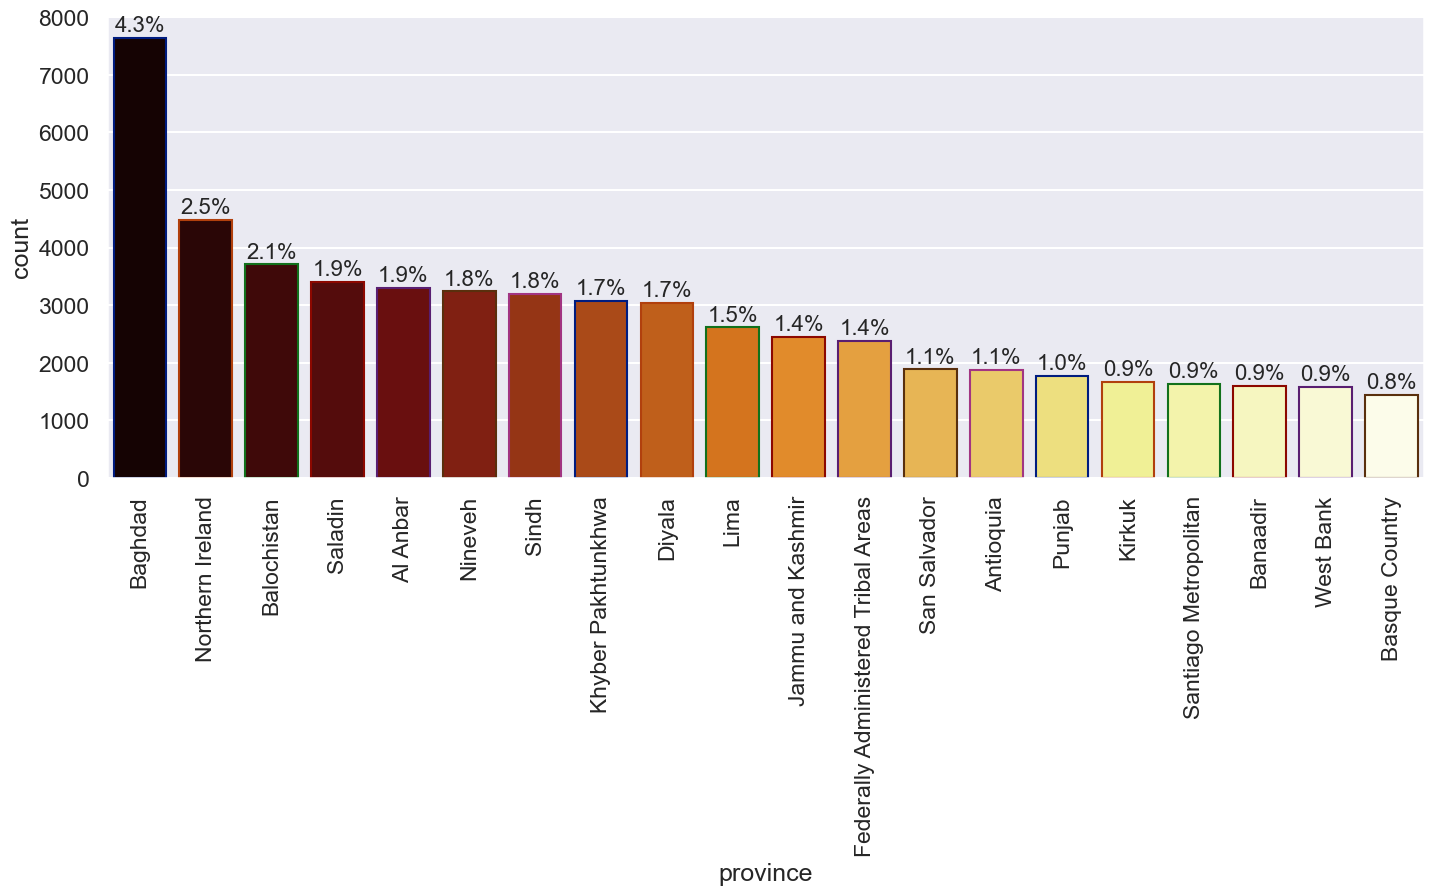

<Figure size 640x480 with 0 Axes>

In [45]:
count_plot(df_copy,'province','afmhot')

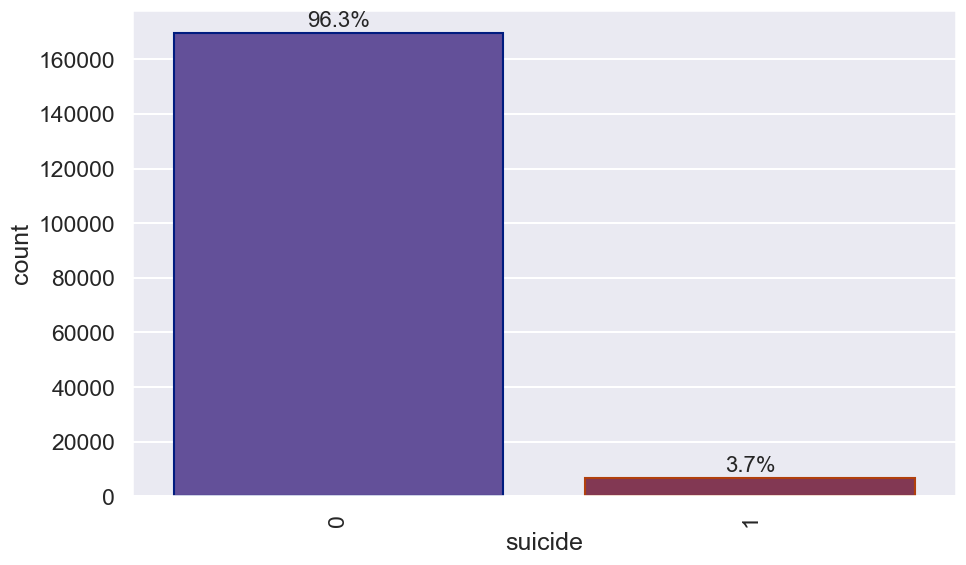

In [46]:
count_plot(df_copy,'suicide','twilight')

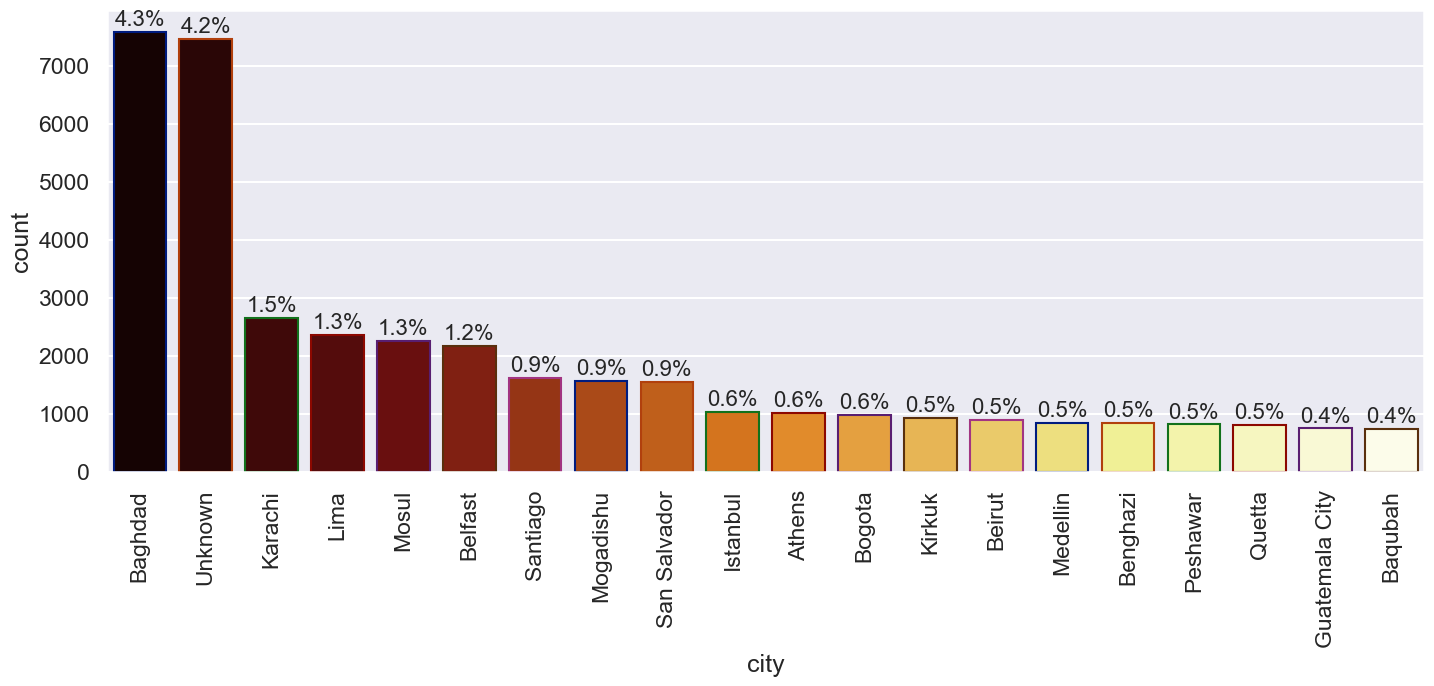

<Figure size 640x480 with 0 Axes>

In [47]:
count_plot(df_copy,'city','afmhot')

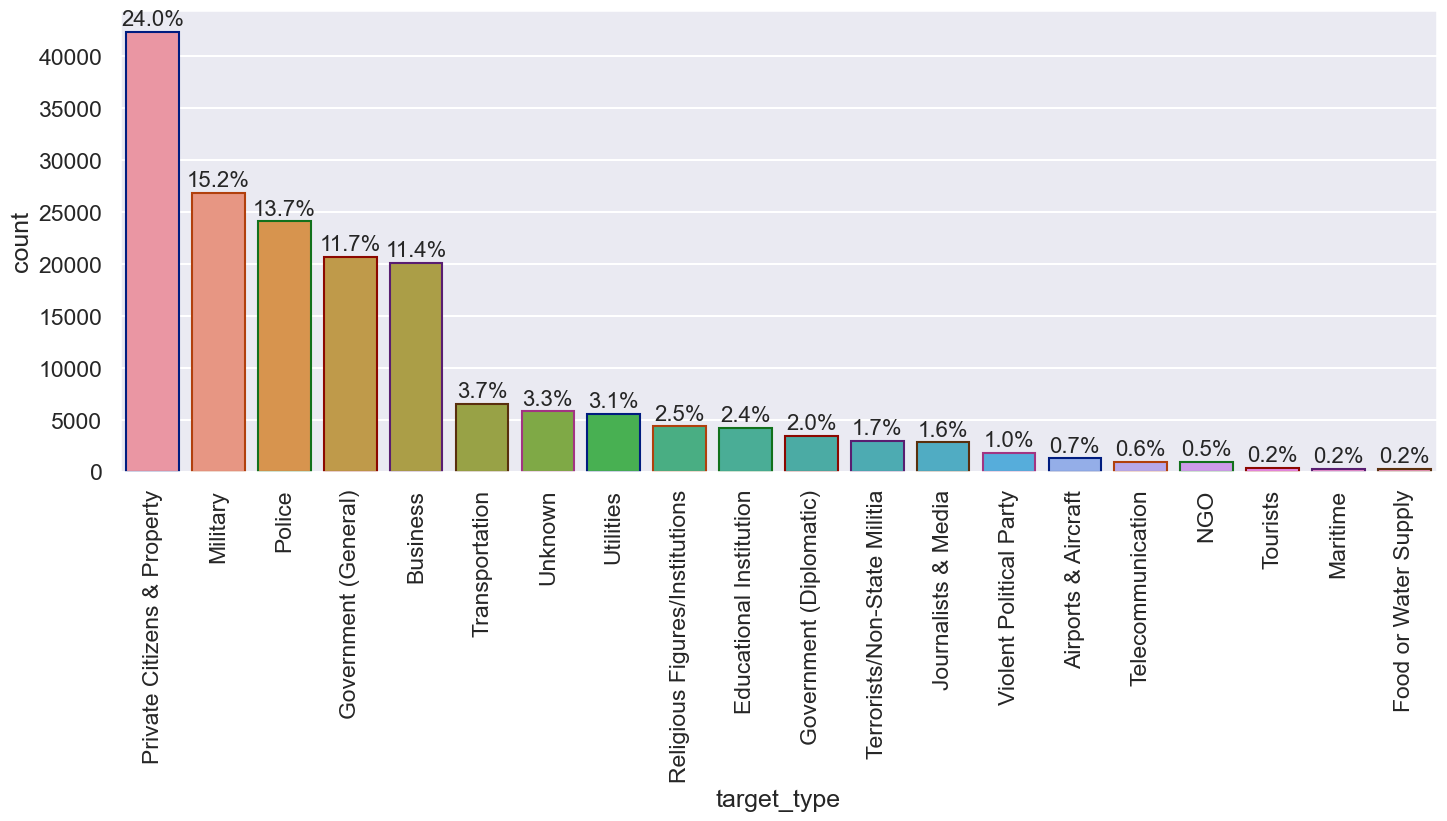

<Figure size 640x480 with 0 Axes>

In [48]:
count_plot(df_copy,'target_type')

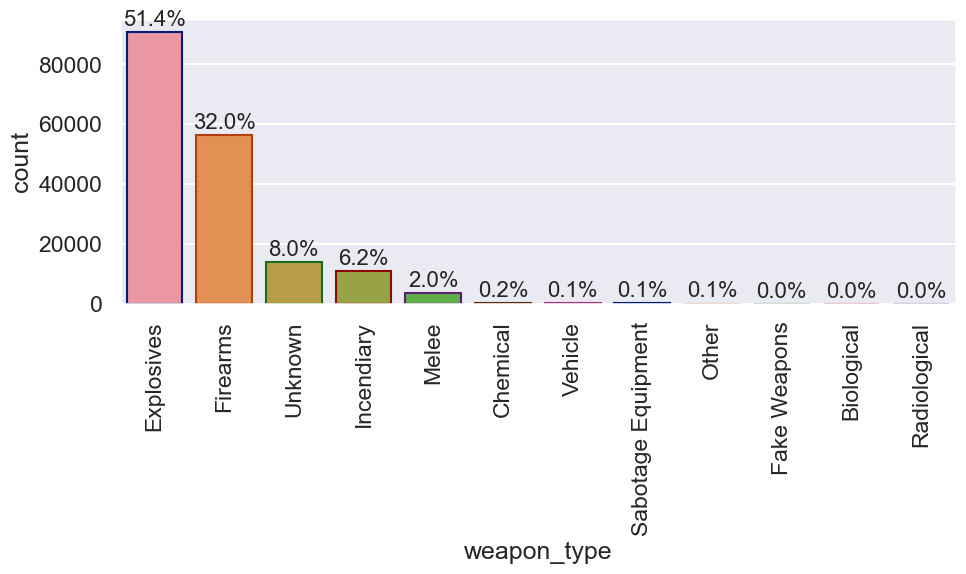

In [49]:
count_plot(df_copy,'weapon_type')

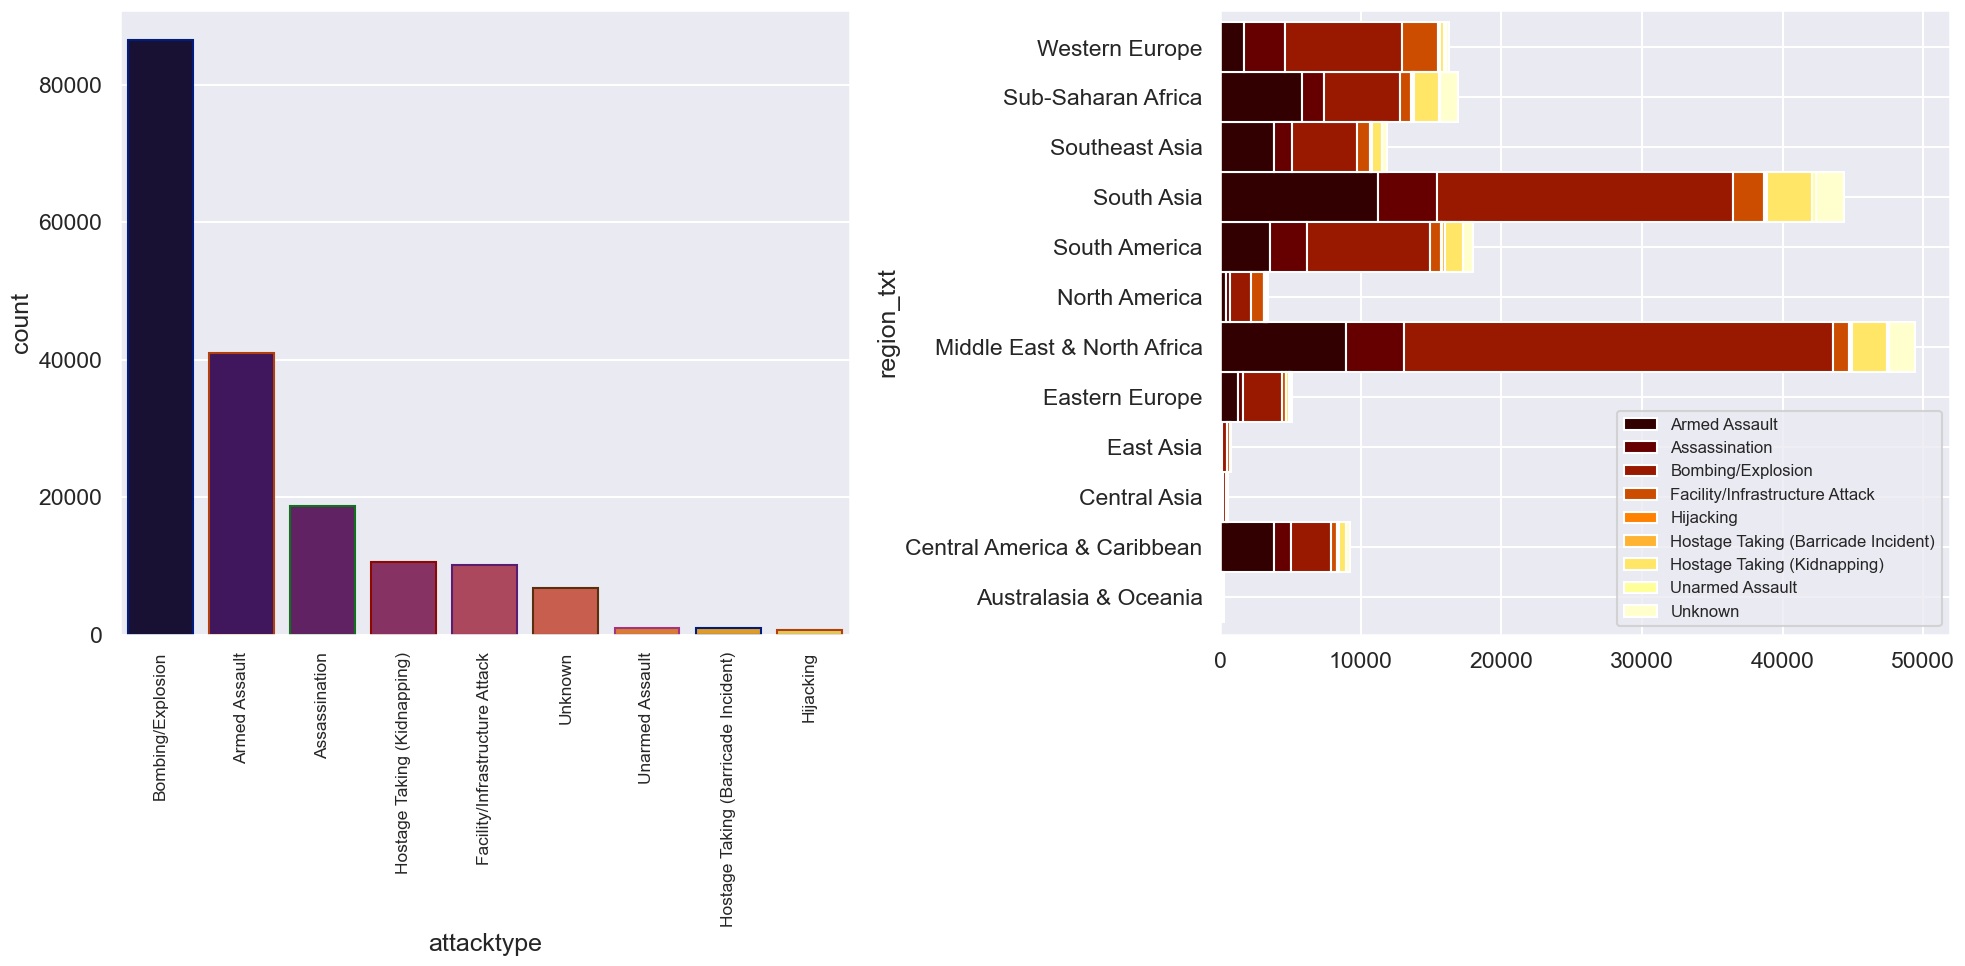

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2 , squeeze = False , figsize =(20,10))
sns.countplot(x='attacktype',data=df_copy,\
                          order=df_copy['attacktype'].value_counts()[:20].index,\
                          palette='inferno',\
                          edgecolor=sns.color_palette('dark',7),\
                          ax=ax[0][0])

total = float(len(df_copy))
labels = ax[0][0].get_xticklabels()
ax[0][0].set_xticklabels(labels,rotation=90,fontsize='x-small')

sns.set_context('talk')
region_attacktype = pd.crosstab(df_copy.region_txt,df_copy.attacktype).plot(stacked=True,width=1,color=sns.color_palette('afmhot',9),kind='barh',ax=ax[0][1])
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

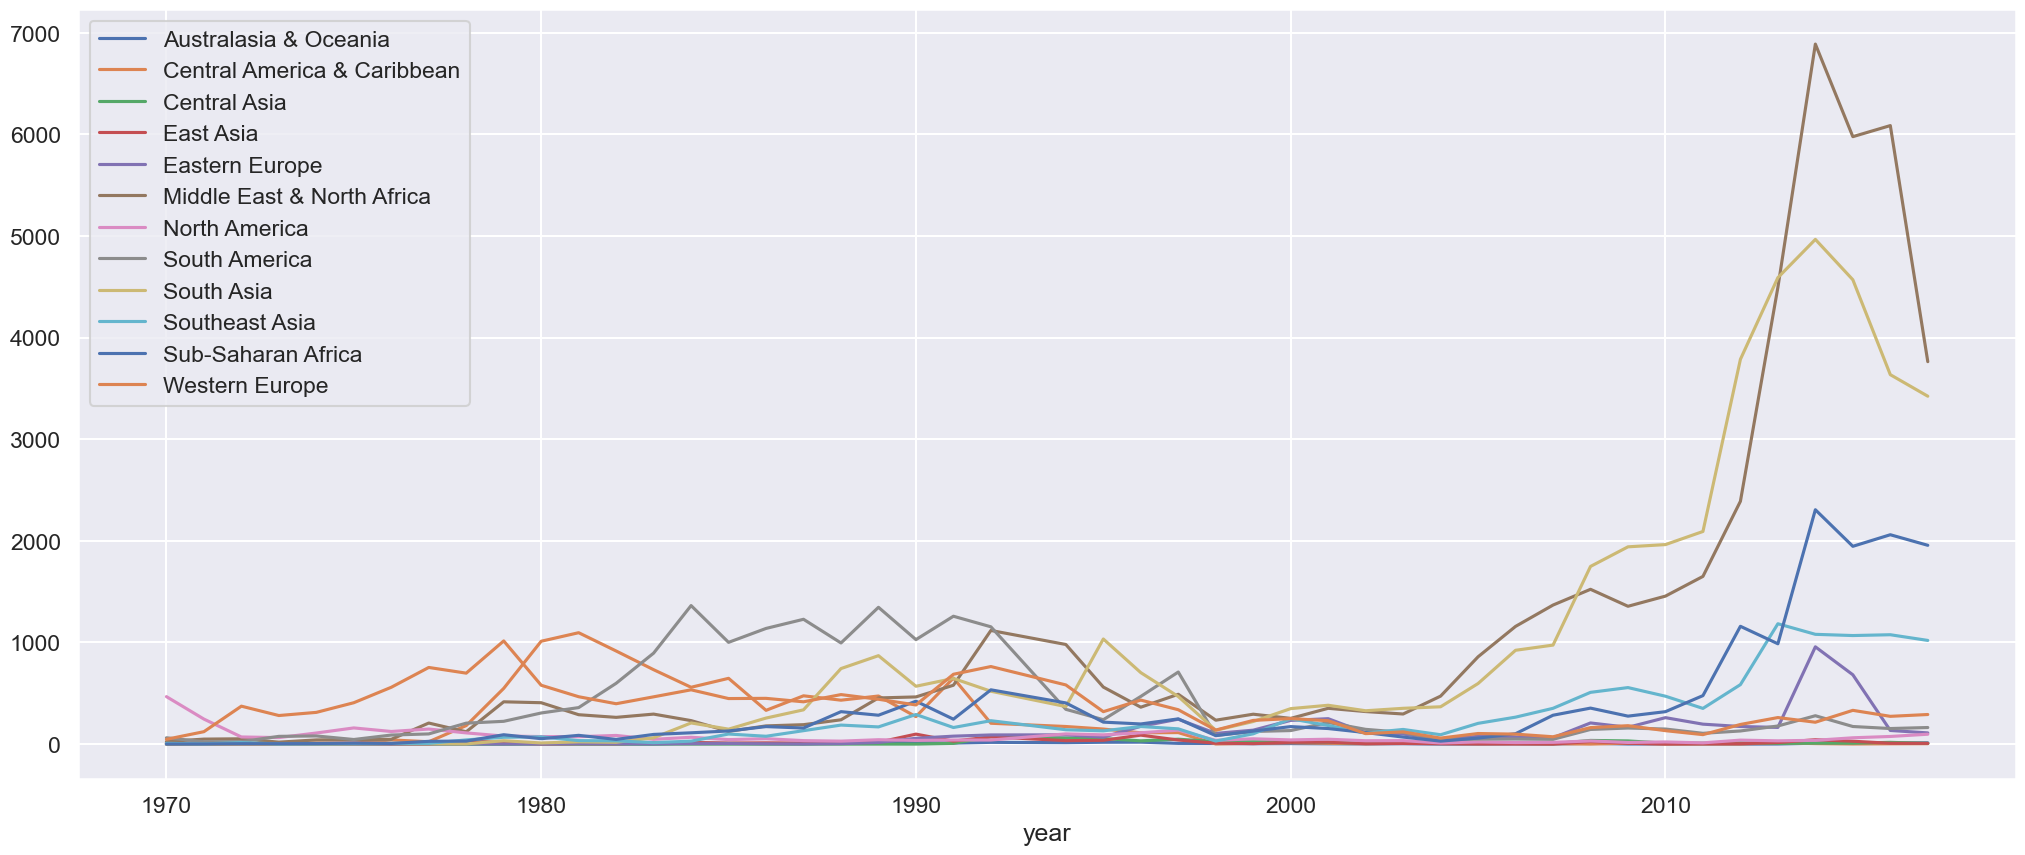

In [51]:
terror_region = pd.crosstab(df_copy.year,df_copy.region_txt)
terror_region.plot()

fig=plt.gcf()
fig.set_size_inches(25,10)
plt.legend(loc='upper left')
plt.show()

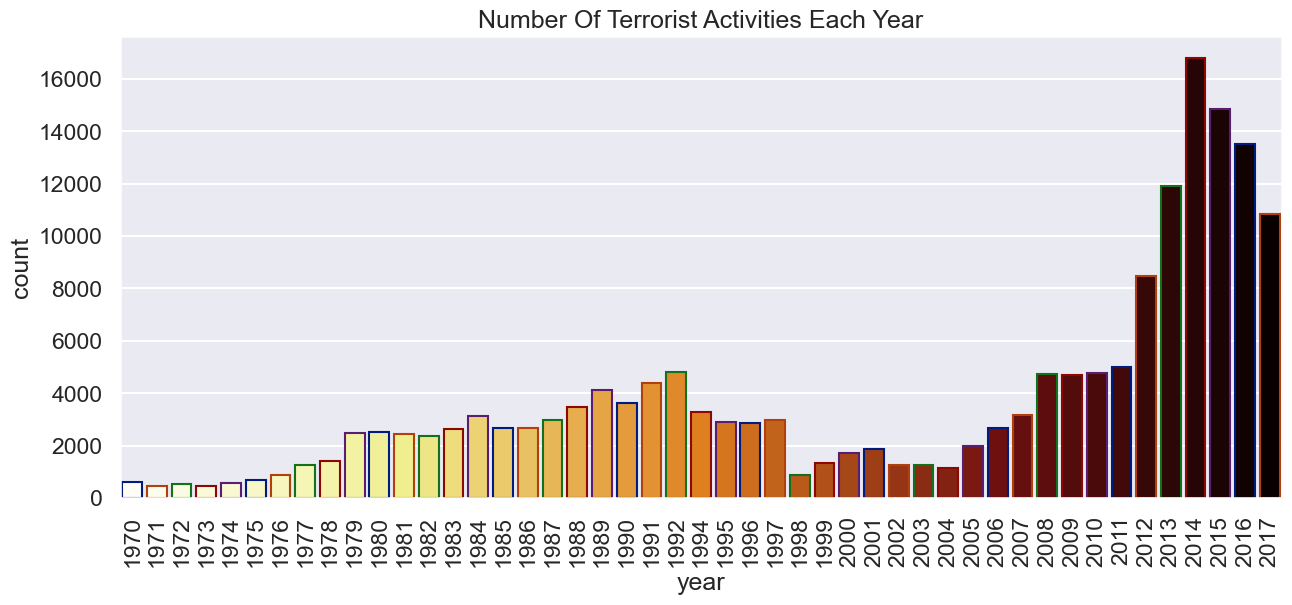

In [52]:
plt.subplots(figsize=(15,6))
sns.countplot(x='year',data=df,palette='afmhot_r',edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

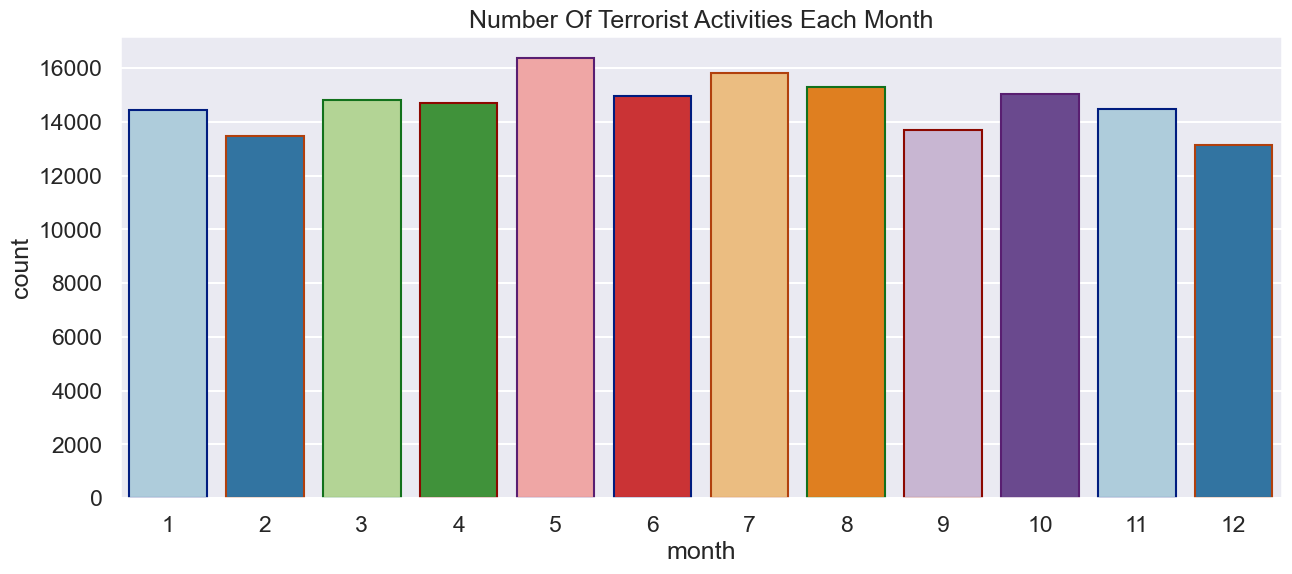

In [53]:
plt.subplots(figsize=(15,6))
sns.countplot(x='month',data=df,palette=sns.color_palette('Paired',10),edgecolor=sns.color_palette('dark',5))

plt.title('Number Of Terrorist Activities Each Month')
plt.show()

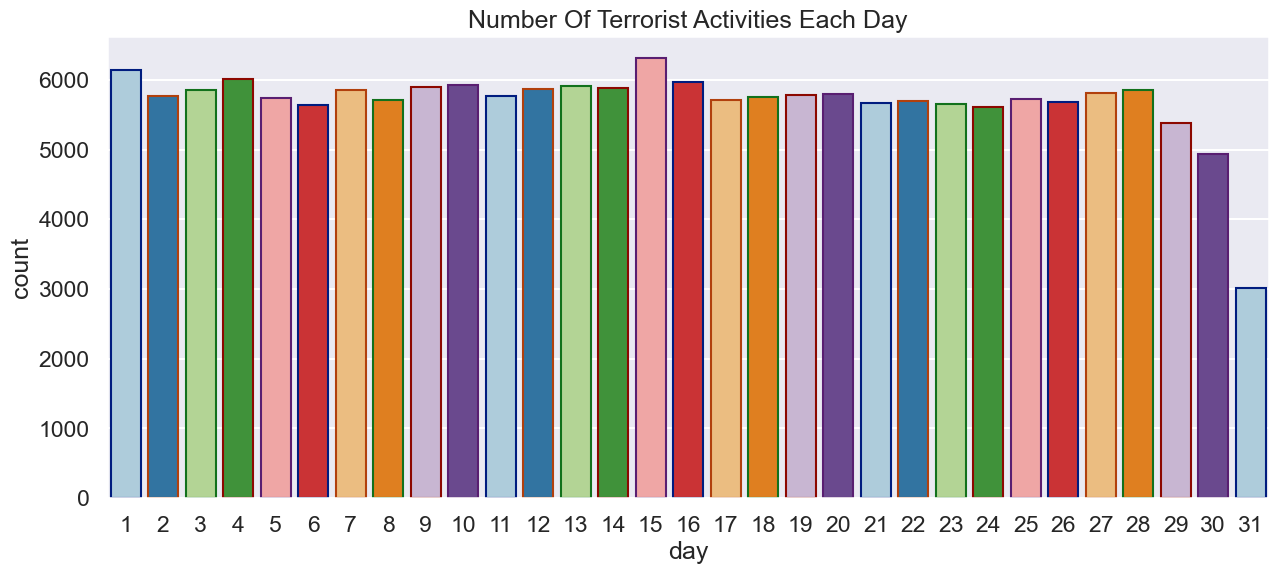

In [54]:
plt.subplots(figsize=(15,6))
sns.countplot(x='day',data=df,palette=sns.color_palette('Paired',10),edgecolor=sns.color_palette('dark',5))

plt.title('Number Of Terrorist Activities Each Day')
plt.show()

In [55]:
df_original.motive.dropna().sample(10).tolist()

['Unknown',
 'Unknown',
 'The specific motive for the attack is unknown.',
 'The specific motive for the attack is unknown.',
 'The attack was carried out to protest against the government',
 'Unknown',
 "The specific motive for the attack was to prevent 14 members of Afghan President Hamid Karzai's Cabinet from being sworn in.",
 'Unknown',
 'The specific motive is unknown; however, Sirmed has received threats from extremist groups in the past and is viewed as being "pro-Indian" by these groups.',
 'The specific motive for the attack is unknown.']